Place all your contents on gdrive and then move the folders to the root directory. The training will be much faster then.

Also try increasing the batch size to 16 or 20.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls

gdrive	sample_data


In [ ]:
cd gdrive/My\ Drive/YoloV3-master/

/content/gdrive/My Drive/YoloV3-master


In [ ]:
!cp -r /content/gdrive/My\ Drive/YoloV3-master /content/

cp: cannot open '/content/gdrive/My Drive/YoloV3-master/data/customdata/labels/8c7b2016.gdoc' for reading: Operation not supported


In [ ]:
ls

gdrive/  sample_data/  YoloV3-master/


In [ ]:
cd YoloV3-master/

/content/YoloV3-master


In [ ]:
ls

 cfg/        output/        runs/              train.py            weights/
 data/       __pycache__/   test.py           'ubdivisions=1'
 detect.py   README.md      ting               utils/
 models.py   results.png    train_batch0.png   vim.exe.stackdump


In [ ]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.6.0+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)


In [ ]:
# training the model on the small coco dataset to check if it works

!python train.py --data data/smalcoco/smalcoco.data --batch 3 --cache --epochs 3 --nosave

Namespace(accumulate=4, adam=False, batch_size=3, bucket='', cache_images=True, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', device='', epochs=3, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2020-10-23 03:55:07.507005: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 6047.15it/s]
Caching images (0.0GB): 100% 20/20 [00:00<00:00, 108.23it/s]
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 7050.44it/s

Now training the model on our custom dataset. The dataset contains the images of people wearing hardhat, vest, mask, and boots.


In [ ]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 5 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=5, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2020-10-23 08:42:36.936475: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
Caching labels (3007 found, 143 missing, 36 empty, 0 duplicate, for 3186 images): 100% 3186/3186 [00:00<00:00, 8323.34it/s]
Caching images (1.8GB): 100% 3186/3186 [00:22<00:00, 142.22it/s]
Caching labels (328 found, 17 missing, 9 empty, 0 duplicate, for 354 images): 100% 354/354 [

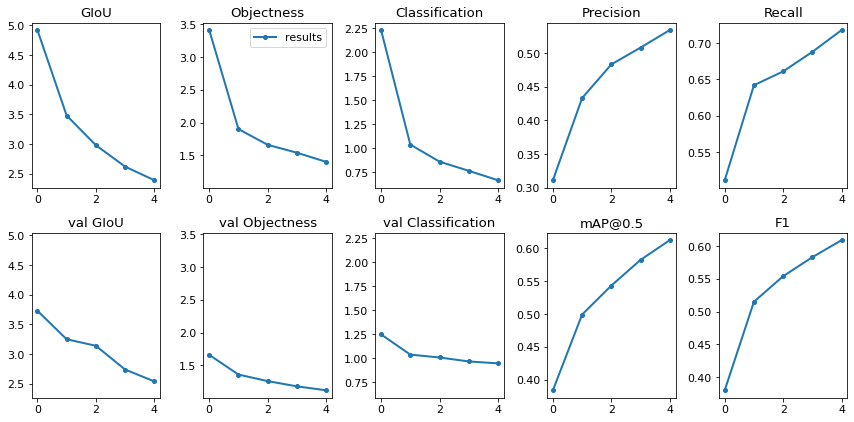

In [ ]:
# results after 5 epochs
from utils import utils
utils.plot_results()

In [ ]:
# testing on our dataset

!python detect.py --conf-thres 0.1 --output out_out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_out', save_txt=False, source='data/customdata/images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
image 1/3590 data/customdata/images/01-prince-boots - Copy.jpg: 512x448 3 bootss, Done. (0.044s)
image 2/3590 data/customdata/images/026f0ffddc.jpg: 384x512 1 vests, 1 masks, Done. (0.037s)
image 3/3590 data/customdata/images/032620_LS_covid-masks_inline-680.jpg: 320x512 1 hardhats, 1 masks, Done. (0.033s)
image 4/3590 data/customdata/images/046acbc8e1.jpg: 384x512 1 vests, 1 masks, Done. (0.037s)
image 5/3590 data/customdata/images/050bdc8229cf18030e2d8a266dd334af84-23-chelsea-boots.rsquare.w1200 - Copy.jpg: 512x512 2 bo

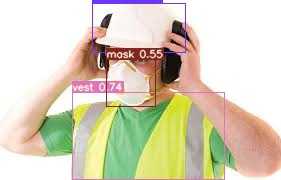

In [ ]:
# displaying the outputs
Image(filename='out_out/E26.jpg', width=600)

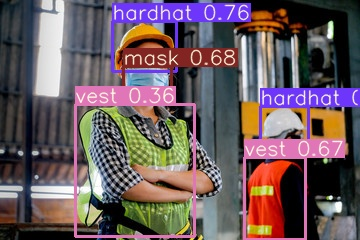

In [ ]:
Image(filename='out_out/E79.jpg', width=600)

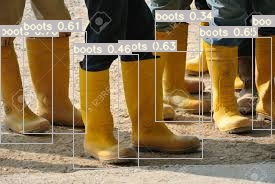

In [ ]:
Image(filename='out_out/E47.jpg', width=600)

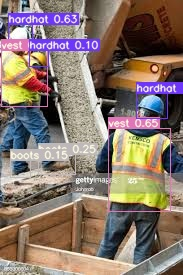

In [ ]:
Image(filename='out_out/E96.jpg', width=600)

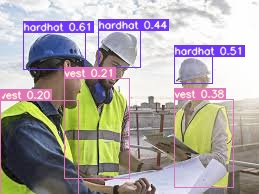

In [ ]:
Image(filename='out_out/E6.jpg', width=600)

In [ ]:
!cp -r /content/gdrive/My\ Drive/YoloV3-master/btb /content/YoloV3-master

In [ ]:
# testing on random images

!python detect.py --conf-thres 0.1 --output out_bob --source '/content/YoloV3-master/btb'

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_bob', save_txt=False, source='/content/YoloV3-master/btb', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
image 1/594 /content/YoloV3-master/btb/frame00001.jpg: 320x512 1 bootss, Done. (0.033s)
image 2/594 /content/YoloV3-master/btb/frame00011.jpg: 320x512 1 bootss, Done. (0.033s)
image 3/594 /content/YoloV3-master/btb/frame00021.jpg: 320x512 1 bootss, Done. (0.033s)
image 4/594 /content/YoloV3-master/btb/frame00031.jpg: 320x512 Done. (0.023s)
image 5/594 /content/YoloV3-master/btb/frame00041.jpg: 320x512 1 vests, 1 bootss, Done. (0.023s)
image 6/594 /content/YoloV3-master/btb/frame00051.jpg: 320x512 Done. (0.023s)
image 

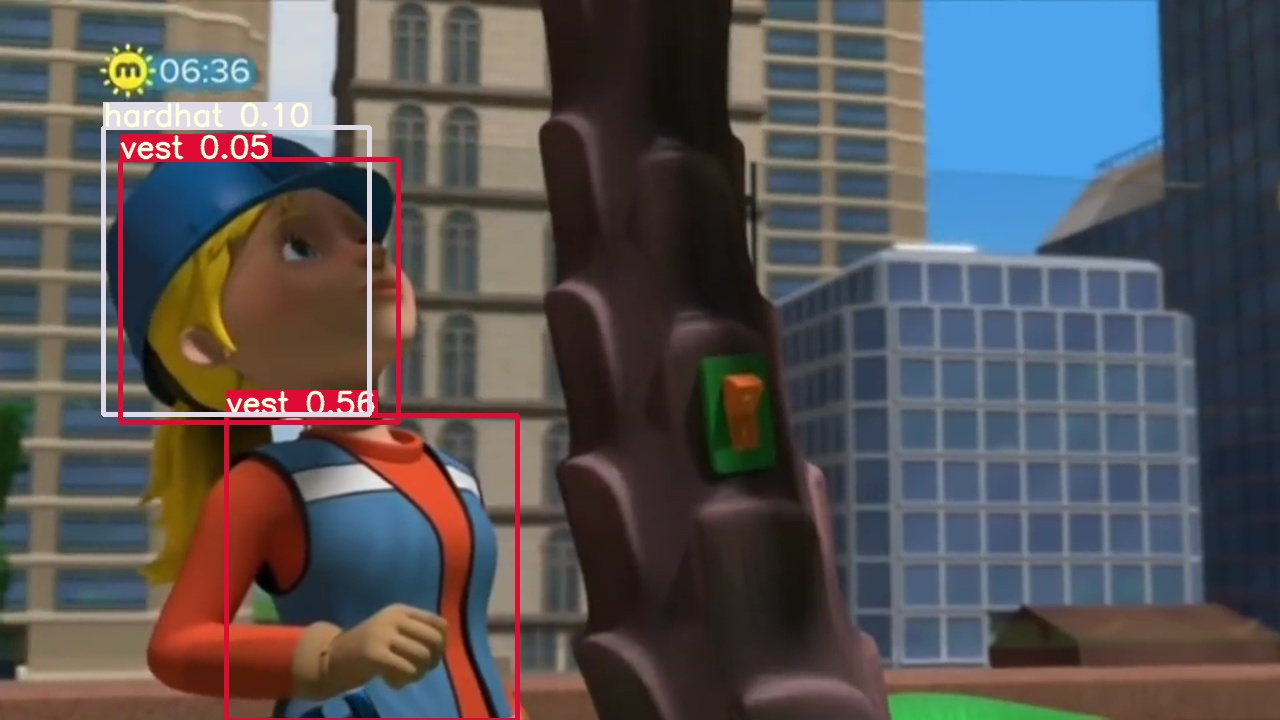

In [ ]:
Image(filename='out_bob/frame13161.jpg', width=600)

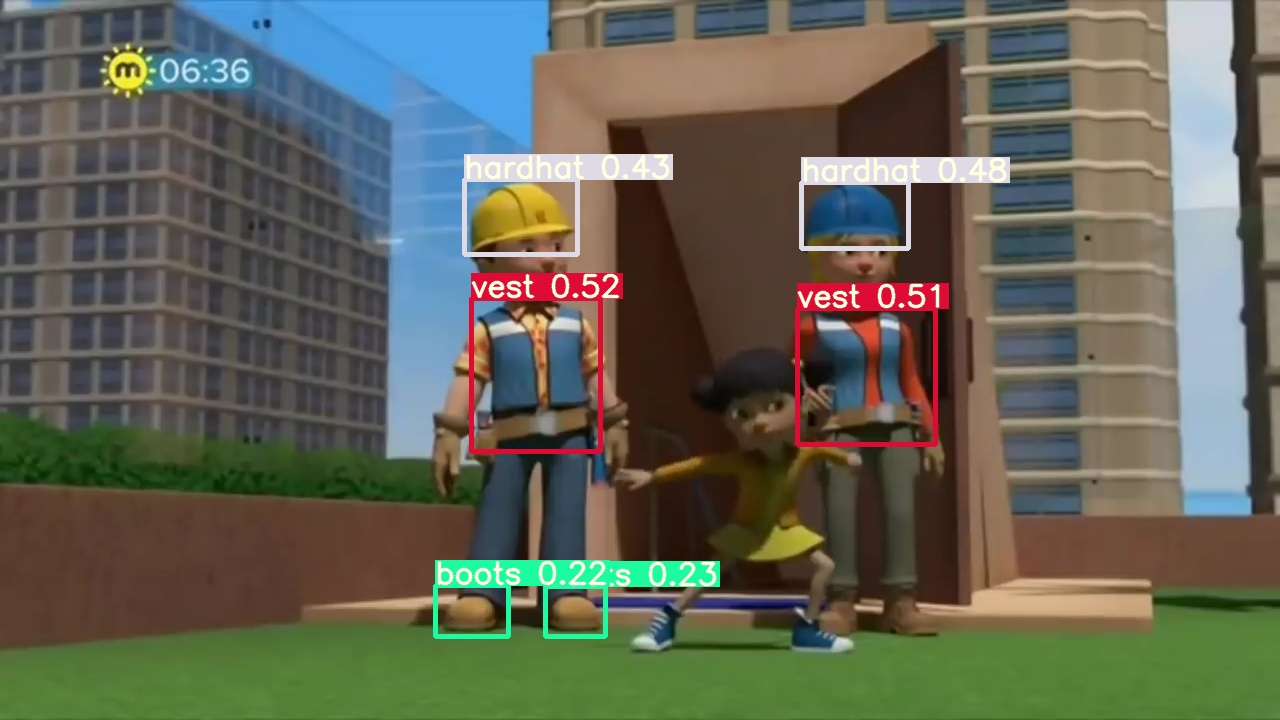

In [ ]:
Image(filename='out_bob/frame12751.jpg', width=600)

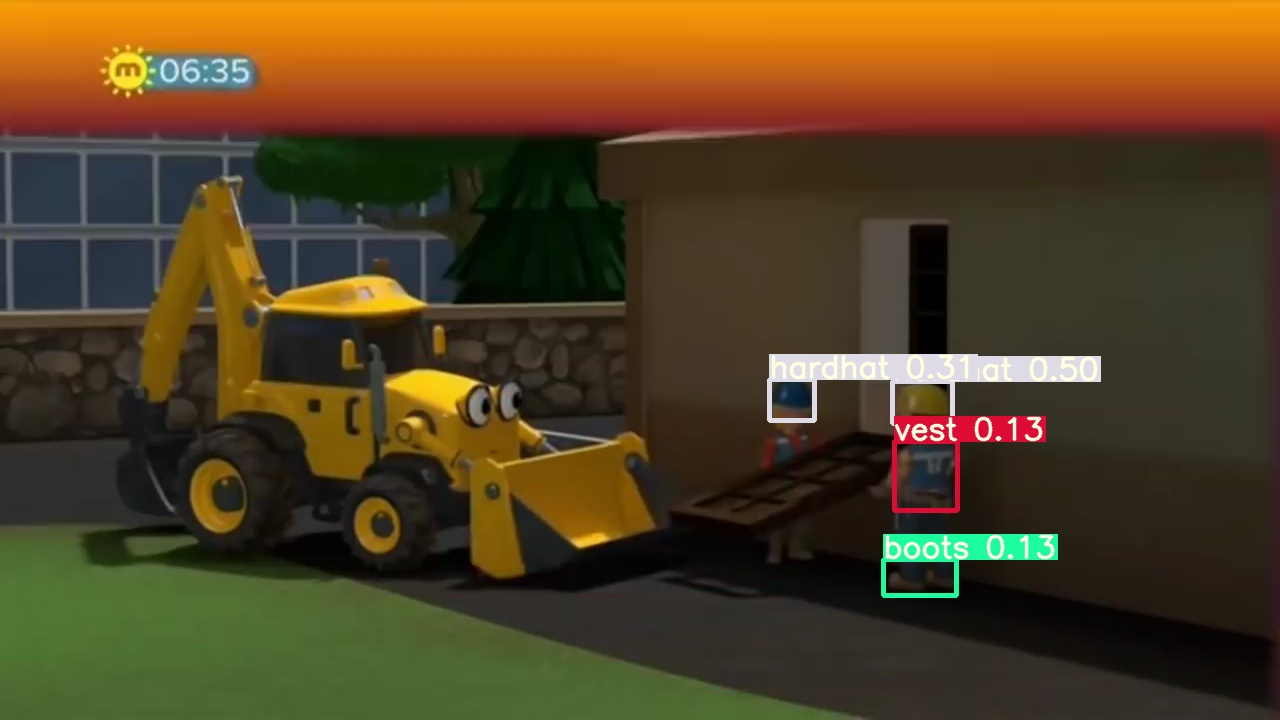

In [ ]:
Image(filename='out_bob/frame11071.jpg', width=600)

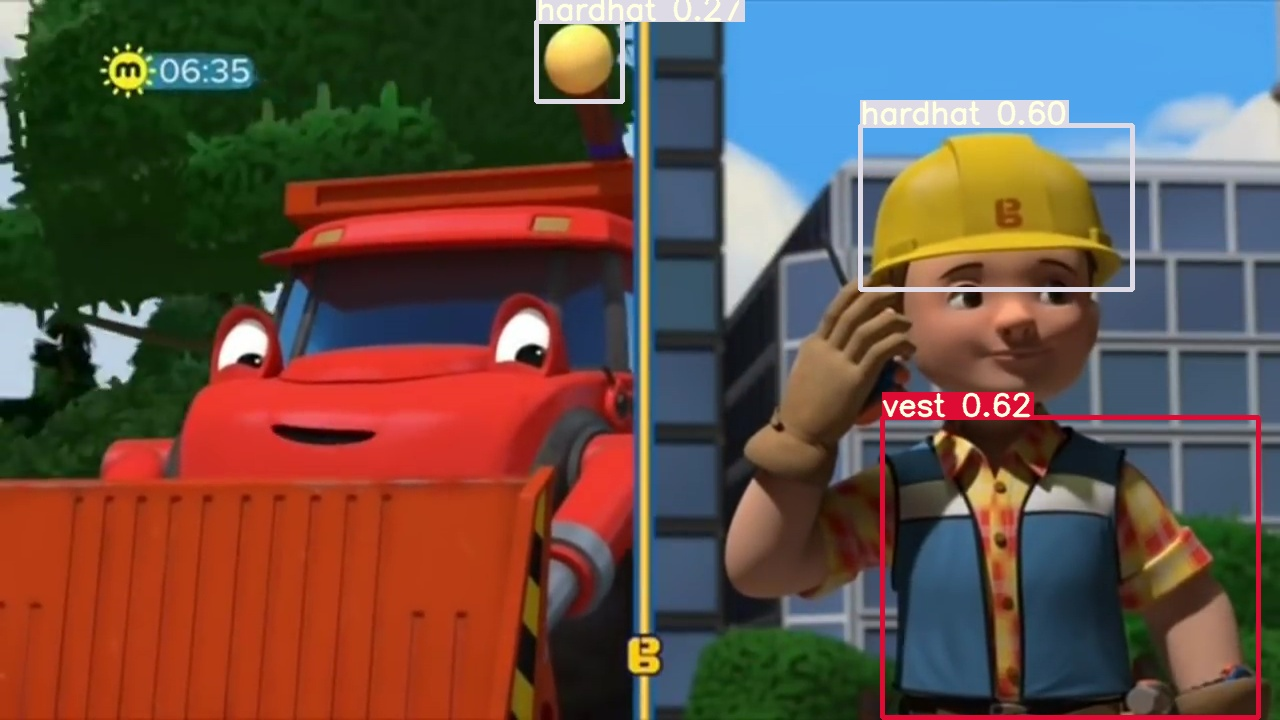

In [ ]:
Image(filename='out_bob/frame10751.jpg', width=600)

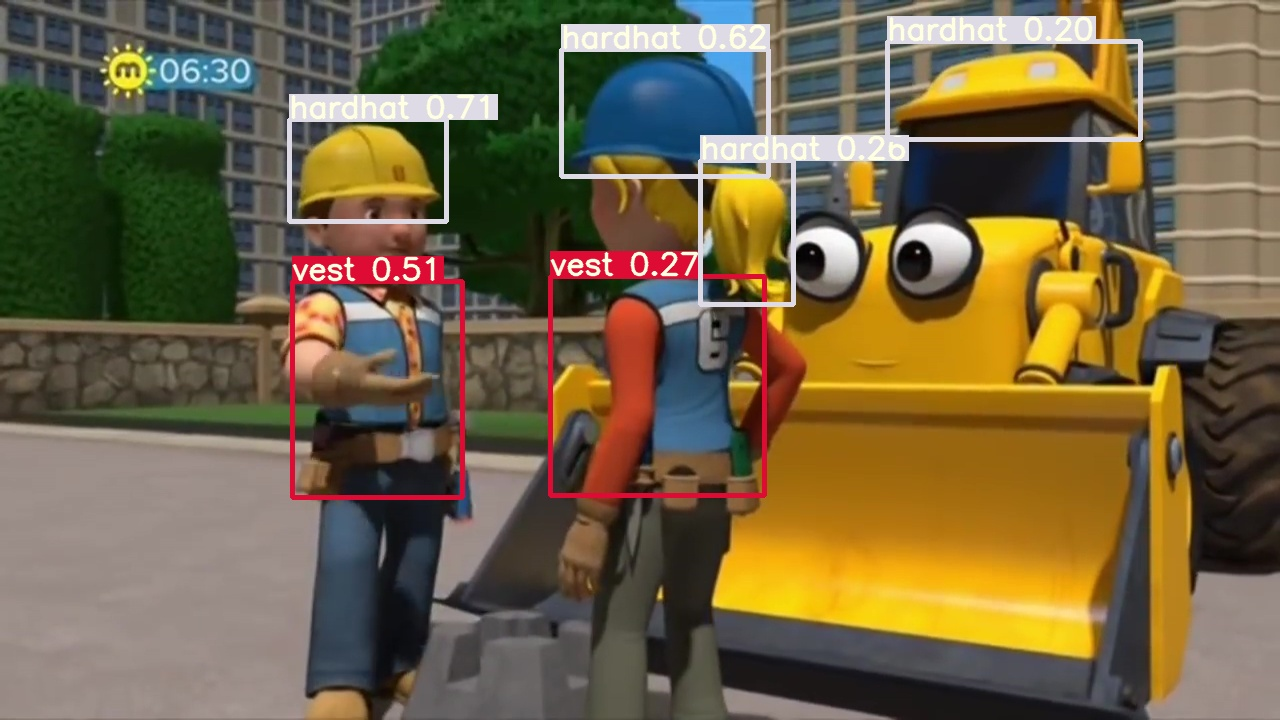

In [ ]:
Image(filename='out_bob/frame06901.jpg', width=600)

In [ ]:
# training for 15 more epochs

!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 15 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=15, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2020-10-23 11:28:58.823727: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
Caching labels (3007 found, 143 missing, 36 empty, 0 duplicate, for 3186 images): 100% 3186/3186 [00:00<00:00, 9508.88it/s]
Caching images (1.8GB): 100% 3186/3186 [00:19<00:00, 162.51it/s]
Caching labels (328 found, 17 missing, 9 empty, 0 duplicate, for 354 images): 100% 354/354 

In [ ]:
!python detect.py --conf-thres 0.3 --output out_hammer --source '/content/YoloV3-master/Alan Jackson - Hard Hat And A Hammer.mp4'

Streaming output truncated to the last 5000 lines.
video 1/1 (2/4998) /content/YoloV3-master/Alan Jackson - Hard Hat And A Hammer.mp4: 320x512 Done. (0.033s)
video 1/1 (3/4998) /content/YoloV3-master/Alan Jackson - Hard Hat And A Hammer.mp4: 320x512 Done. (0.033s)
video 1/1 (4/4998) /content/YoloV3-master/Alan Jackson - Hard Hat And A Hammer.mp4: 320x512 Done. (0.033s)
video 1/1 (5/4998) /content/YoloV3-master/Alan Jackson - Hard Hat And A Hammer.mp4: 320x512 Done. (0.021s)
video 1/1 (6/4998) /content/YoloV3-master/Alan Jackson - Hard Hat And A Hammer.mp4: 320x512 Done. (0.018s)
video 1/1 (7/4998) /content/YoloV3-master/Alan Jackson - Hard Hat And A Hammer.mp4: 320x512 Done. (0.018s)
video 1/1 (8/4998) /content/YoloV3-master/Alan Jackson - Hard Hat And A Hammer.mp4: 320x512 Done. (0.018s)
video 1/1 (9/4998) /content/YoloV3-master/Alan Jackson - Hard Hat And A Hammer.mp4: 320x512 Done. (0.018s)
video 1/1 (10/4998) /content/YoloV3-master/Alan Jackson - Hard Hat And A Hammer.mp4: 320x512 

In [ ]:
# testing on a video, the output will also be a video with stripped audio

!python detect.py --conf-thres 0.3 --output out_constr --source '/content/YoloV3-master/construction_prank.mp4'

Streaming output truncated to the last 5000 lines.
video 1/1 (4354/9350) /content/YoloV3-master/construction_prank.mp4: 320x512 1 hardhats, 1 vests, Done. (0.017s)
video 1/1 (4355/9350) /content/YoloV3-master/construction_prank.mp4: 320x512 1 hardhats, 1 vests, Done. (0.017s)
video 1/1 (4356/9350) /content/YoloV3-master/construction_prank.mp4: 320x512 1 hardhats, 1 vests, Done. (0.018s)
video 1/1 (4357/9350) /content/YoloV3-master/construction_prank.mp4: 320x512 1 hardhats, 1 vests, Done. (0.017s)
video 1/1 (4358/9350) /content/YoloV3-master/construction_prank.mp4: 320x512 1 hardhats, 1 vests, Done. (0.017s)
video 1/1 (4359/9350) /content/YoloV3-master/construction_prank.mp4: 320x512 1 hardhats, 1 vests, Done. (0.018s)
video 1/1 (4360/9350) /content/YoloV3-master/construction_prank.mp4: 320x512 1 hardhats, 1 vests, Done. (0.017s)
video 1/1 (4361/9350) /content/YoloV3-master/construction_prank.mp4: 320x512 1 hardhats, 1 vests, Done. (0.017s)
video 1/1 (4362/9350) /content/YoloV3-master/

In [ ]:
!python detect.py --conf-thres 0.3 --output out_constr_2 --source '/content/YoloV3-master/Construction_2.mp4'

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_constr_2', save_txt=False, source='/content/YoloV3-master/Construction_2.mp4', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
video 1/1 (1/960) /content/YoloV3-master/Construction_2.mp4: 320x512 1 hardhats, 1 vests, Done. (0.033s)
video 1/1 (2/960) /content/YoloV3-master/Construction_2.mp4: 320x512 1 hardhats, 1 vests, Done. (0.033s)
video 1/1 (3/960) /content/YoloV3-master/Construction_2.mp4: 320x512 1 hardhats, 1 vests, Done. (0.033s)
video 1/1 (4/960) /content/YoloV3-master/Construction_2.mp4: 320x512 1 hardhats, 1 vests, Done. (0.022s)
video 1/1 (5/960) /content/YoloV3-master/Construction_2.mp4: 320x512 1 hardhats, 1 

In [ ]:
!python detect.py --conf-thres 0.3 --output out_constr_3 --source '/content/YoloV3-master/constr_3.mp4'

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_constr_3', save_txt=False, source='/content/YoloV3-master/constr_3.mp4', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
video 1/1 (1/1023) /content/YoloV3-master/constr_3.mp4: 320x512 Done. (0.033s)
video 1/1 (2/1023) /content/YoloV3-master/constr_3.mp4: 320x512 Done. (0.033s)
video 1/1 (3/1023) /content/YoloV3-master/constr_3.mp4: 320x512 Done. (0.030s)
video 1/1 (4/1023) /content/YoloV3-master/constr_3.mp4: 320x512 Done. (0.022s)
video 1/1 (5/1023) /content/YoloV3-master/constr_3.mp4: 320x512 1 vests, Done. (0.022s)
video 1/1 (6/1023) /content/YoloV3-master/constr_3.mp4: 320x512 1 vests, Done. (0.022s)
video 1/1 (7/1023

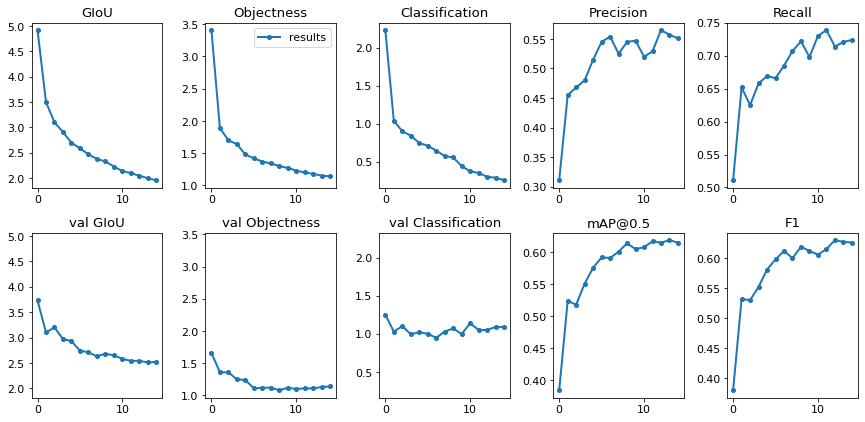

In [ ]:
from utils import utils
utils.plot_results()